<a href="https://colab.research.google.com/github/syliviakisakye256/LOCAL-GOVERNMENT-UPE-GRANT-EFFICIENCY-ANALYSIS/blob/main/REF_PROJECT_WORK%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Import necessary packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
#Load the data
df = pd.read_excel('/content/PROJECT DTA Book1.xlsx')
df.head()

,S/N,Local government,UPE enrollement,USE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,USE Performance Index,UPE Performance index,Approved annual budget,USE release,UPE release,UPE Grant per enrolled student,USE grant per enrolled student,UPE EPES,USE EPES,UPE release efficiency,USE release efficiency
0,501,Adjumani District,59198,3399.0,1203679,792184,0.33,0.44,82072000,2.388417e+08,3.798394e+08,20.333102,233.063842,0.021640,0.001416,315.565363,301.497716
1,502,Apac District,57414,1502.0,1102277,297926,0.35,0.56,72044000,8.995667e+07,3.487947e+08,19.198749,198.352863,0.029169,0.001765,316.431048,301.942988
2,503,Arua District,46118,2378.0,906108,503336,0.35,0.45,74660000,1.535667e+08,2.836347e+08,19.647600,211.663583,0.022904,0.001654,313.025232,305.097721
3,504,Bugiri District,89200,5445.0,1800313,1080928,0.23,0.49,113028000,3.286950e+08,5.712530e+08,20.182881,198.517539,0.024278,0.001159,317.307583,304.085934
4,505,Bundibugyo District,62647,5859.0,1290282,1186893,0.23,0.61,100820000,3.612150e+08,4.050321e+08,20.596070,202.576037,0.029617,0.001135,313.909776,304.336617


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   S/N                                     176 non-null    int64  
 1   Local government                        176 non-null    object 
 2   UPE enrollement                         176 non-null    int64  
 3   USE enrollement                         174 non-null    float64
 4   Primary non-wage conditional  grant     176 non-null    int64  
 5   Secondary  non-wage conditional  grant  176 non-null    int64  
 6   USE Performance Index                   166 non-null    float64
 7   UPE Performance index                   166 non-null    float64
 8   Approved annual budget                  176 non-null    int64  
 9   USE release                             174 non-null    float64
 10  UPE release                             176 non-null    float6

In [9]:
df.columns

Index(['S/N', 'Local government ', 'UPE enrollement', 'USE enrollement',
       'Primary non-wage conditional  grant',
       'Secondary  non-wage conditional  grant', 'USE Performance Index',
       'UPE Performance index', 'Approved annual budget ', 'USE release',
       'UPE release', 'UPE Grant per enrolled student',
       'USE grant per enrolled student', 'UPE EPES', 'USE EPES',
       'UPE release efficiency', 'USE release efficiency'],
      dtype='object')

In [10]:
df.drop(columns =['S/N'], inplace = True)

In [11]:
# set local government to be the index
df.set_index('Local government ', inplace=True)

In [12]:
df.head()

,UPE enrollement,USE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,USE Performance Index,UPE Performance index,Approved annual budget,USE release,UPE release,UPE Grant per enrolled student,USE grant per enrolled student,UPE EPES,USE EPES,UPE release efficiency,USE release efficiency
Local government,,,,,,,,,,,,,,,
Adjumani District,59198,3399.0,1203679,792184,0.33,0.44,82072000,2.388417e+08,3.798394e+08,20.333102,233.063842,0.021640,0.001416,315.565363,301.497716
Apac District,57414,1502.0,1102277,297926,0.35,0.56,72044000,8.995667e+07,3.487947e+08,19.198749,198.352863,0.029169,0.001765,316.431048,301.942988
Arua District,46118,2378.0,906108,503336,0.35,0.45,74660000,1.535667e+08,2.836347e+08,19.647600,211.663583,0.022904,0.001654,313.025232,305.097721
Bugiri District,89200,5445.0,1800313,1080928,0.23,0.49,113028000,3.286950e+08,5.712530e+08,20.182881,198.517539,0.024278,0.001159,317.307583,304.085934
Bundibugyo District,62647,5859.0,1290282,1186893,0.23,0.61,100820000,3.612150e+08,4.050321e+08,20.596070,202.576037,0.029617,0.001135,313.909776,304.336617


In [13]:
df.isna().sum()

,0
UPE enrollement,0
USE enrollement,2
Primary non-wage conditional grant,0
Secondary non-wage conditional grant,0
USE Performance Index,10
UPE Performance index,10
Approved annual budget,0
USE release,2
UPE release,0
UPE Grant per enrolled student,0


In [14]:
# Impute missing values with the mean for the specified columns
cols_to_impute = ['USE enrollement', 'USE Performance Index', 'UPE Performance index',
                     'USE release', 'USE grant per enrolled student', 'UPE EPES',
                     'USE EPES', 'USE release efficiency']

for col in cols_to_impute:
    df[col] = df[col].fillna(df[col].mean())

In [15]:
df.isna().sum()

,0
UPE enrollement,0
USE enrollement,0
Primary non-wage conditional grant,0
Secondary non-wage conditional grant,0
USE Performance Index,0
UPE Performance index,0
Approved annual budget,0
USE release,0
UPE release,0
UPE Grant per enrolled student,0


In [16]:
df_copy = df.copy()
df_copy.head()

,UPE enrollement,USE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,USE Performance Index,UPE Performance index,Approved annual budget,USE release,UPE release,UPE Grant per enrolled student,USE grant per enrolled student,UPE EPES,USE EPES,UPE release efficiency,USE release efficiency
Local government,,,,,,,,,,,,,,,
Adjumani District,59198,3399.0,1203679,792184,0.33,0.44,82072000,2.388417e+08,3.798394e+08,20.333102,233.063842,0.021640,0.001416,315.565363,301.497716
Apac District,57414,1502.0,1102277,297926,0.35,0.56,72044000,8.995667e+07,3.487947e+08,19.198749,198.352863,0.029169,0.001765,316.431048,301.942988
Arua District,46118,2378.0,906108,503336,0.35,0.45,74660000,1.535667e+08,2.836347e+08,19.647600,211.663583,0.022904,0.001654,313.025232,305.097721
Bugiri District,89200,5445.0,1800313,1080928,0.23,0.49,113028000,3.286950e+08,5.712530e+08,20.182881,198.517539,0.024278,0.001159,317.307583,304.085934
Bundibugyo District,62647,5859.0,1290282,1186893,0.23,0.61,100820000,3.612150e+08,4.050321e+08,20.596070,202.576037,0.029617,0.001135,313.909776,304.336617


In [17]:
df_copy.drop(columns=['USE enrollement','Secondary non-wage conditional grant','USE Performance Index','USE release','USE grant per enrolled student','USE EPES','USE release efficiency'], inplace=True,errors='ignore')

In [18]:
df_copy.describe()

,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE EPES,UPE release efficiency
count,176.000000,1.760000e+02,1.760000e+02,176.000000,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000
mean,43396.818182,9.032698e+05,8.316314e+05,0.560060,8.271609e+07,2.802060e+08,21.953738,0.025631,300.083788
std,28687.371904,5.568836e+05,5.811400e+05,0.084485,2.230187e+07,1.810549e+08,2.866635,0.003666,23.442727
min,1917.000000,7.962700e+04,9.100000e+02,0.410000,5.111600e+07,1.319403e+07,18.759488,0.013621,165.697984
25%,19155.000000,4.392688e+05,4.110182e+05,0.490000,6.637600e+07,1.286302e+08,20.326937,0.022988,292.759295
50%,40115.500000,8.387360e+05,7.017550e+05,0.560000,7.923800e+07,2.596273e+08,21.335255,0.025631,308.583542
75%,62784.250000,1.247146e+06,1.097982e+06,0.610000,9.308100e+07,3.929284e+08,22.739305,0.028252,315.120605
max,143126.000000,2.768450e+06,2.882789e+06,0.750000,1.640400e+08,8.843973e+08,41.537298,0.033364,322.365589


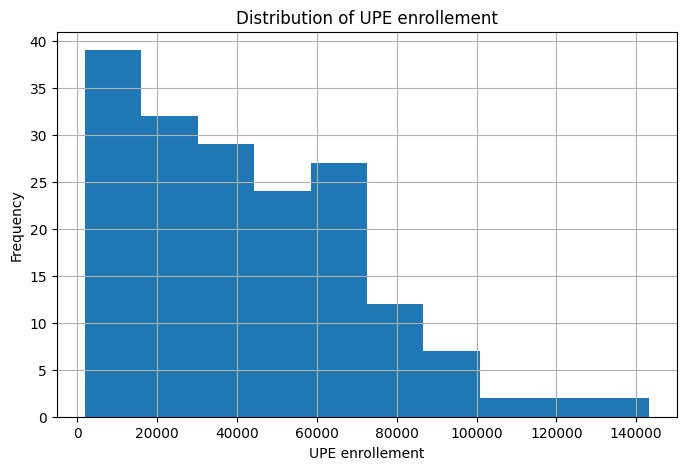

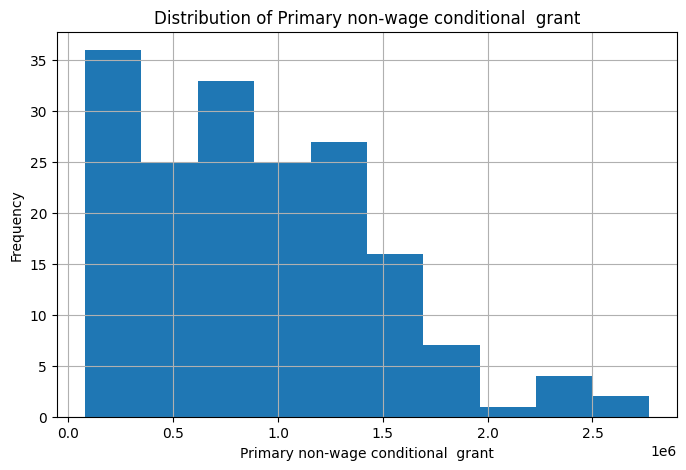

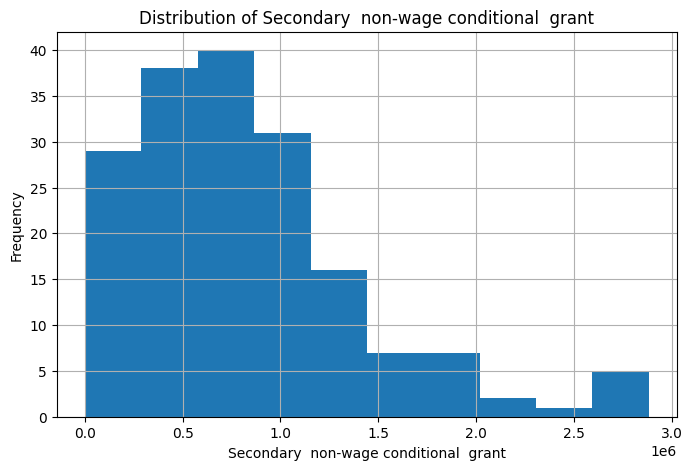

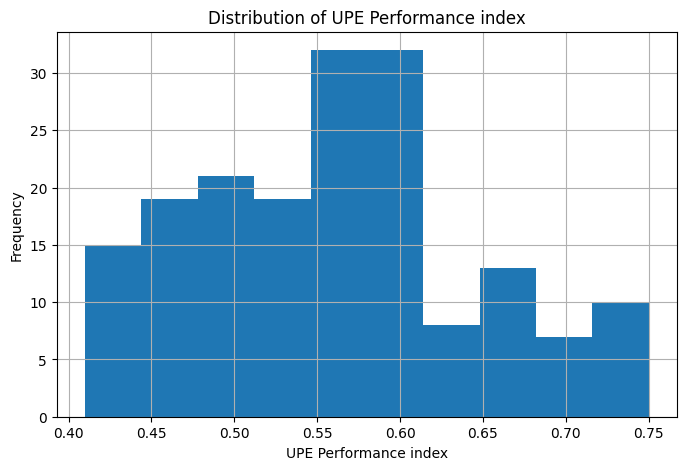

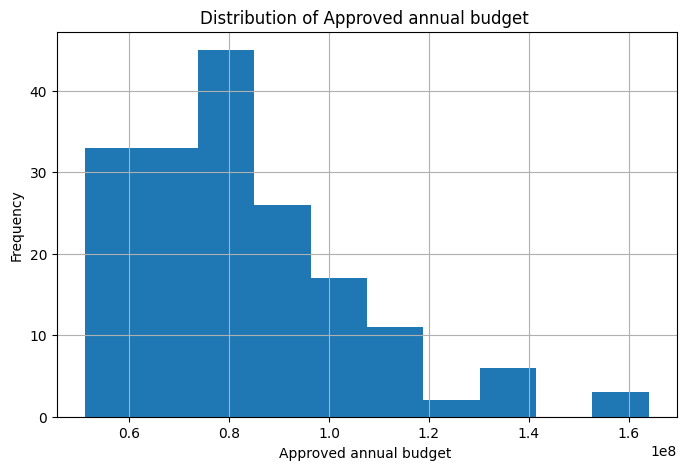

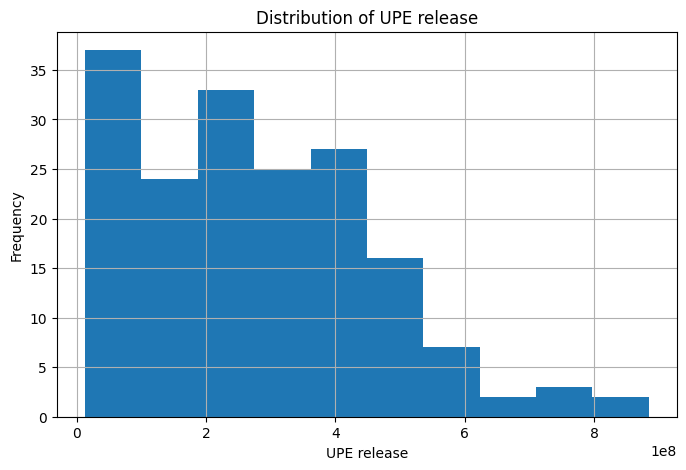

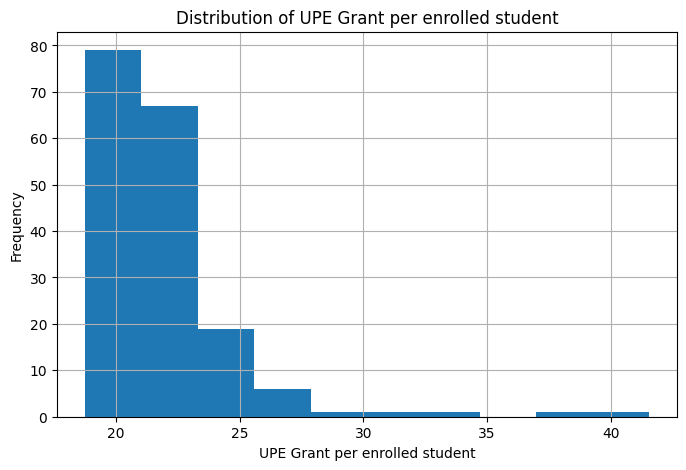

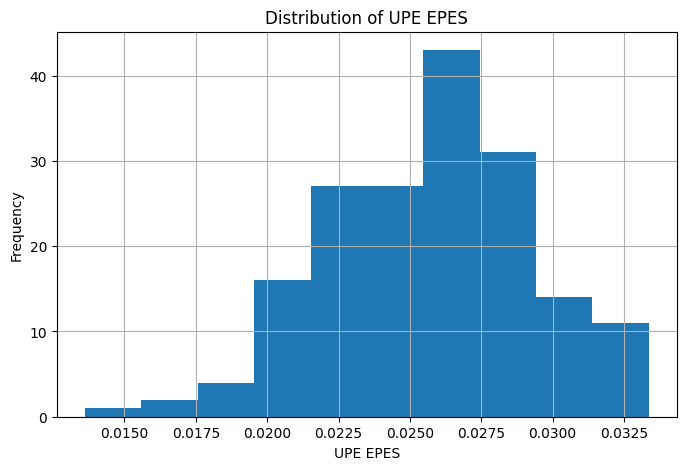

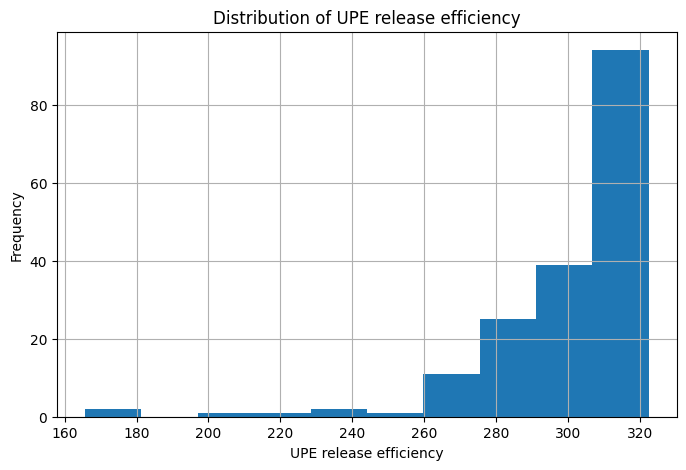

In [19]:
# Generate histograms for each column with titles and labels
for col in df_copy.columns:
    plt.figure(figsize=(8, 5))
    df_copy[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Most of the histograms appear to be skewed to the right, meaning there are more local governments with lower values of forinstance enrollment rates, performance index among others and fewer with higher values.

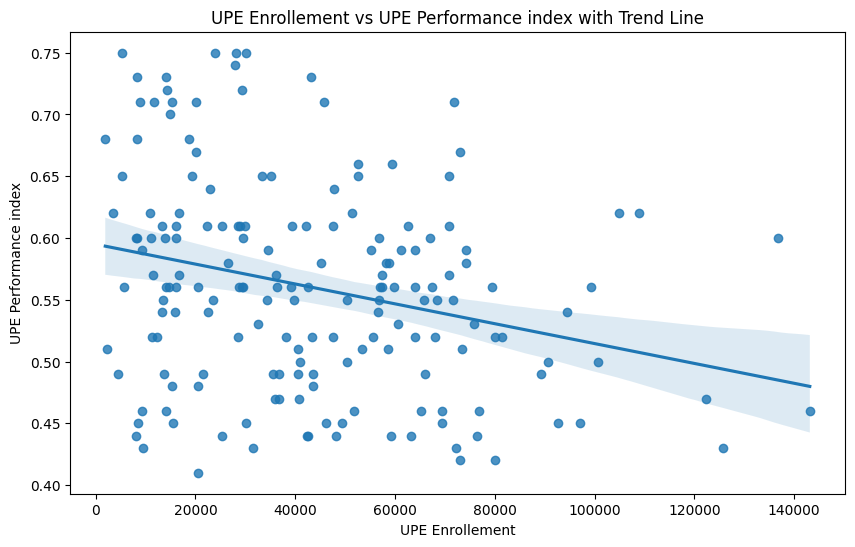

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_copy, x='UPE enrollement', y='UPE Performance index')
plt.title('UPE Enrollement vs UPE Performance index with Trend Line')
plt.xlabel('UPE Enrollement')
plt.ylabel('UPE Performance index')
plt.show()

The trend line slopes downward, meaning:

As UPE enrollment increases, the UPE performance index tends to decrease.

This suggests that districts with higher student numbers generally have lower performance outcomes.

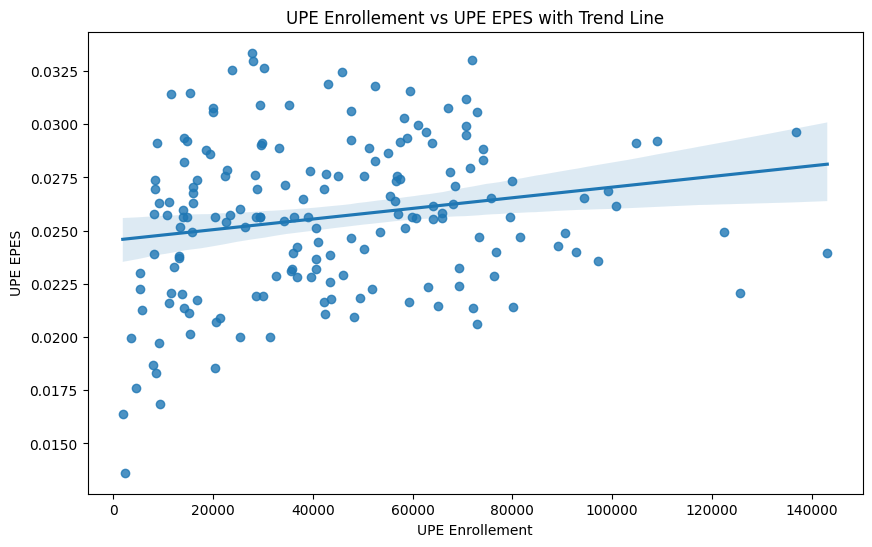

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_copy, x='UPE enrollement', y='UPE EPES')
plt.title('UPE Enrollement vs UPE EPES with Trend Line')
plt.xlabel('UPE Enrollement')
plt.ylabel('UPE EPES')
plt.show()

1. Positive Relationship (Upward Slope)

The trend line is slightly upward, meaning:

As UPE enrollment increases, the UPE EPES also tends to increase.

This indicates a weak positive association.

**Policy Interpretation**

This insight suggests:

Growth in enrollment does not harm efficiency (unlike performance index).

Efficiency might improve slightly as schools scale up.

However, because the relationship is weak, policymakers must look at:

Funding adequacy

Teacher/staff numbers

Infrastructure

Management effectiveness

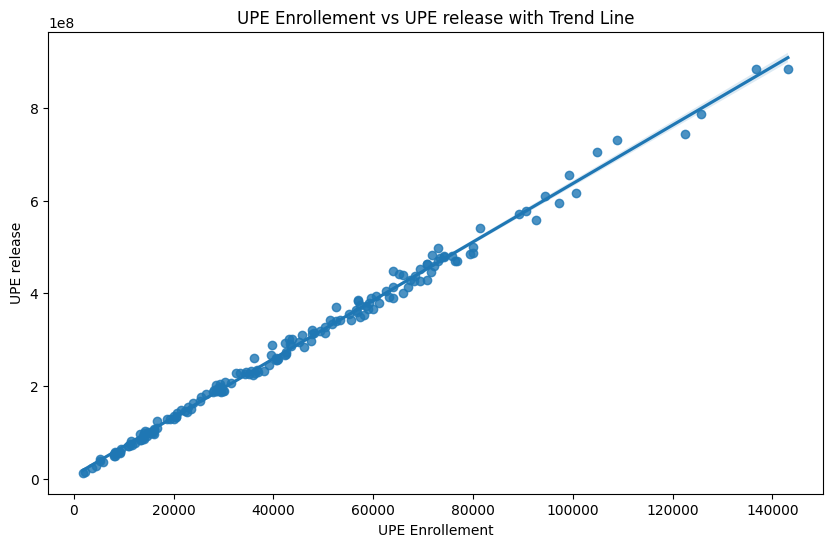

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_copy, x='UPE enrollement', y='UPE release')
plt.title('UPE Enrollement vs UPE release with Trend Line')
plt.xlabel('UPE Enrollement')
plt.ylabel('UPE release')
plt.show()

In [23]:
numeric_df = df_copy.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
display(correlation_matrix)

,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE EPES,UPE release efficiency
UPE enrollement,1.000000,0.996352,0.657329,-0.272997,0.800874,0.997505,-0.604784,0.195692,0.703074
Primary non-wage conditional grant,0.996352,1.000000,0.681211,-0.241922,0.846981,0.999878,-0.585232,0.210937,0.704848
Secondary non-wage conditional grant,0.657329,0.681211,1.000000,0.040241,0.744134,0.676944,-0.345785,0.301232,0.477206
UPE Performance index,-0.272997,-0.241922,0.040241,1.000000,0.014216,-0.248160,0.345760,0.747721,-0.239279
Approved annual budget,0.800874,0.846981,0.744134,0.014216,1.000000,0.838647,-0.361098,0.290730,0.583038
UPE release,0.997505,0.999878,0.676944,-0.248160,0.838647,1.000000,-0.589190,0.207850,0.705246
UPE Grant per enrolled student,-0.604784,-0.585232,-0.345785,0.345760,-0.361098,-0.589190,1.000000,-0.339575,-0.921509
UPE EPES,0.195692,0.210937,0.301232,0.747721,0.290730,0.207850,-0.339575,1.000000,0.394484
UPE release efficiency,0.703074,0.704848,0.477206,-0.239279,0.583038,0.705246,-0.921509,0.394484,1.000000


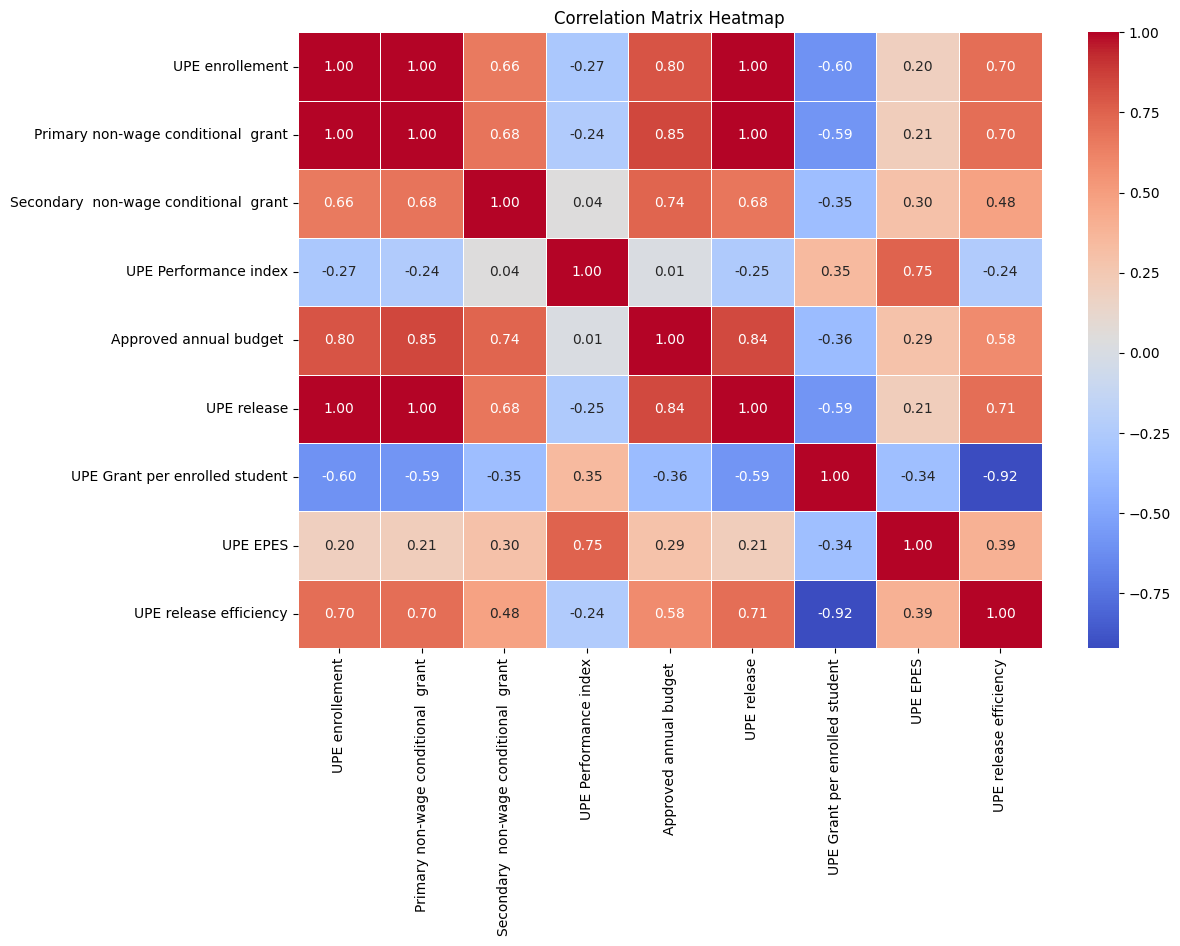

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

UPE enrollment and UPE release show a very strong positive correlation (close to 1). This is expected because districts with larger numbers of learners typically receive higher fund releases.
Similarly, the Primary non-wage conditional grant is also highly positively correlated with UPE release, indicating that the release of funds closely follows enrollment levels and the grant allocation formula.

In [25]:
# Identify outliers in 'Primary non-wage conditional grant'
Q1_primary = df_copy['Primary non-wage conditional  grant'].quantile(0.25)
Q3_primary = df_copy['Primary non-wage conditional  grant'].quantile(0.75)
IQR_primary = Q3_primary - Q1_primary

lower_bound_primary = Q1_primary - 1.5 * IQR_primary
upper_bound_primary = Q3_primary + 1.5 * IQR_primary

outliers_primary = df_copy[(df_copy['Primary non-wage conditional  grant'] < lower_bound_primary) | (df_copy['Primary non-wage conditional  grant'] > upper_bound_primary)]

print("Potential Outliers in 'Primary non-wage conditional grant':")
display(outliers_primary)

Potential Outliers in 'Primary non-wage conditional grant':


,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE EPES,UPE release efficiency
Local government,,,,,,,,,
Kasese District,136810,2768450,2681435,0.60,160552000,8.832857e+08,20.235728,0.029651,319.054224
Tororo District,143126,2747670,2882789,0.46,130904000,8.843973e+08,19.197560,0.023961,321.871743


These two local governments have significantly higher values for 'Primary non-wage conditional grant' compared to the majority of the other local governments in the dataset, falling above the calculated upper bound.

This suggests that Kasese District and Tororo District received exceptionally large primary non-wage conditional grants. Further investigation might be needed to understand the reasons behind these higher grant allocations in these specific districts.

In [26]:
# Identify outliers in 'UPE enrollement'
Q1_upe_enrollment = df_copy['UPE enrollement'].quantile(0.25)
Q3_upe_enrollment = df_copy['UPE enrollement'].quantile(0.75)
IQR_upe_enrollment = Q3_upe_enrollment - Q1_upe_enrollment

lower_bound_upe_enrollment = Q1_upe_enrollment - 1.5 * IQR_upe_enrollment
upper_bound_upe_enrollment = Q3_upe_enrollment + 1.5 * IQR_upe_enrollment

outliers_upe_enrollment = df_copy[(df_copy['UPE enrollement'] < lower_bound_upe_enrollment) | (df_copy['UPE enrollement'] > upper_bound_upe_enrollment)]

print("Potential Outliers in 'UPE enrollement':")
display(outliers_upe_enrollment)

Potential Outliers in 'UPE enrollement':


,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE EPES,UPE release efficiency
Local government,,,,,,,,,
Kasese District,136810,2768450,2681435,0.60,160552000,8.832857e+08,20.235728,0.029651,319.054224
Tororo District,143126,2747670,2882789,0.46,130904000,8.843973e+08,19.197560,0.023961,321.871743


In [27]:
X = df_copy.drop(columns=['UPE EPES'])
y = df_copy['UPE EPES']

In [28]:
# Identify outliers in 'UPE EPES'
Q1_upe_epes = df_copy['UPE EPES'].quantile(0.25)
Q3_upe_epes = df_copy['UPE EPES'].quantile(0.75)
IQR_upe_epes = Q3_upe_epes - Q1_upe_epes

lower_bound_upe_epes = Q1_upe_epes - 1.5 * IQR_upe_epes
upper_bound_upe_epes = Q3_upe_epes + 1.5 * IQR_upe_epes

outliers_upe_epes = df_copy[(df_copy['UPE EPES'] < lower_bound_upe_epes) | (df_copy['UPE EPES'] > upper_bound_upe_epes)]

print("Potential Outliers in 'UPE EPES':")
display(outliers_upe_epes)

Potential Outliers in 'UPE EPES':


,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE EPES,UPE release efficiency
Local government,,,,,,,,,
Kisoro Municipal Council,2307,86377,130800,0.51,51116000,1.555867e+07,37.441266,0.013621,180.12511


This local government has an exceptionally low 'UPE EPES' value compared to the others.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
X_train.head()

,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE release efficiency
Local government,,,,,,,,
Masindi Municipal Council,16069,372698,618965,0.61,63760000,1.081282e+08,23.193603,290.122745
Arua District,46118,906108,503336,0.45,74660000,2.836347e+08,19.647600,313.025232
Rubirizi District,23890,550790,719252,0.75,75968000,1.643915e+08,23.055253,298.464872
Bugweri District,42622,862385,1074818,0.56,74660000,2.684863e+08,20.233330,311.329974
Koboko Municipal Council,13441,293657,255093,0.55,54168000,8.396310e+07,21.847854,285.922352


In [31]:
len(X_test)/len(X) * 100

25.0

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
y_train.value_counts(1)

,proportion
UPE EPES,
0.025631,0.053030
0.026300,0.007576
0.032531,0.007576
0.027677,0.007576
0.025174,0.007576
...,...
0.029007,0.007576
0.021740,0.007576
0.023016,0.007576


In [34]:
df_copy.shape

(176, 9)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)
y_pred

array([0.02843986, 0.02182233, 0.02650631, 0.0289345 , 0.02981464,
       0.02877944, 0.03127745, 0.02578963, 0.0223113 , 0.02976828,
       0.0248863 , 0.02762863, 0.02599593, 0.02615221, 0.02649903,
       0.02653392, 0.02323617, 0.02914563, 0.02713517, 0.02561102,
       0.02012153, 0.02592099, 0.02723177, 0.02573642, 0.02655266,
       0.01950558, 0.02611406, 0.02125758, 0.02943144, 0.02592634,
       0.02931224, 0.02137019, 0.02626585, 0.0286732 , 0.0320225 ,
       0.02524918, 0.02443392, 0.0267653 , 0.02802143, 0.02458156,
       0.02772789, 0.02885933, 0.02226406, 0.02336249])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0012
R-squared (R2): 0.8879


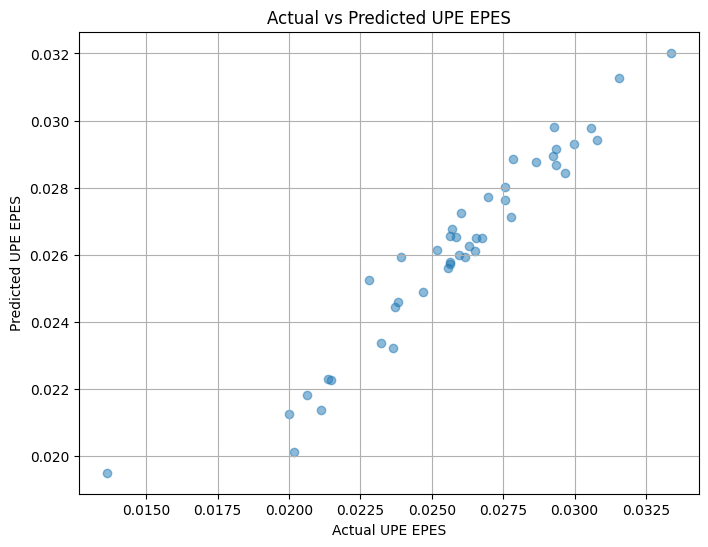

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual UPE EPES")
plt.ylabel("Predicted UPE EPES")
plt.title("Actual vs Predicted UPE EPES")
plt.grid(True)
plt.show()

Feature Importances:


,0
UPE Performance index,0.640749
UPE Grant per enrolled student,0.193681
UPE release efficiency,0.050321
UPE enrollement,0.038679
UPE release,0.023021
Primary non-wage conditional grant,0.022896
Approved annual budget,0.015643
Secondary non-wage conditional grant,0.015010


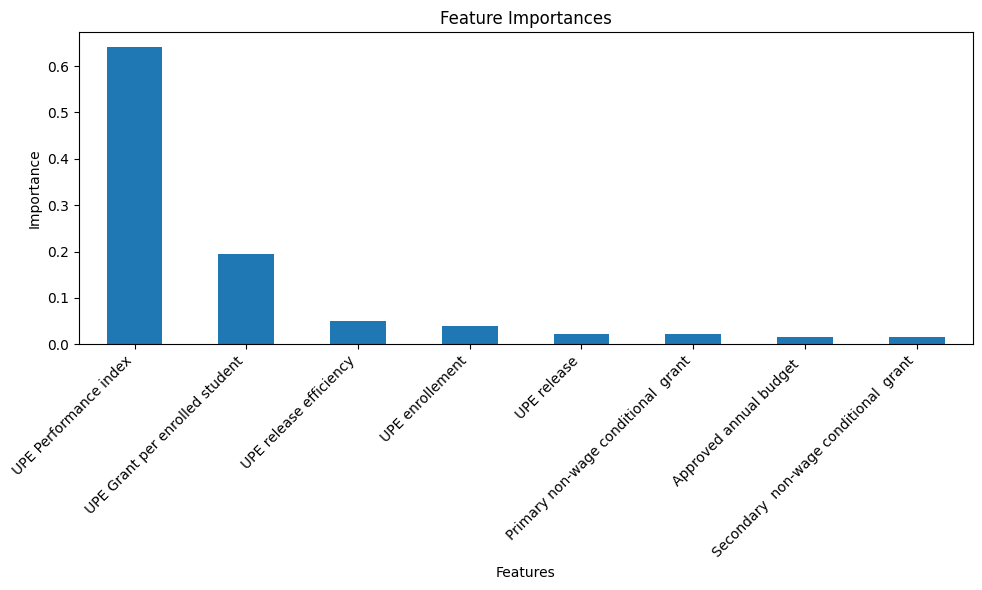

In [39]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
display(sorted_feature_importances)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Analyze the feature importance of the trained model and then train and evaluate a RandomForestRegressor model using PCA-transformed data.

## Apply pca

### Subtask:
Apply PCA to the scaled training data (`X_train_scaled`) and transform both the training and testing data. Determine the optimal number of components.


**Reasoning**:
Apply PCA to the scaled training data and transform both the training and testing data, then calculate and plot the cumulative explained variance to determine the optimal number of components.



In [40]:
# import libraries
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

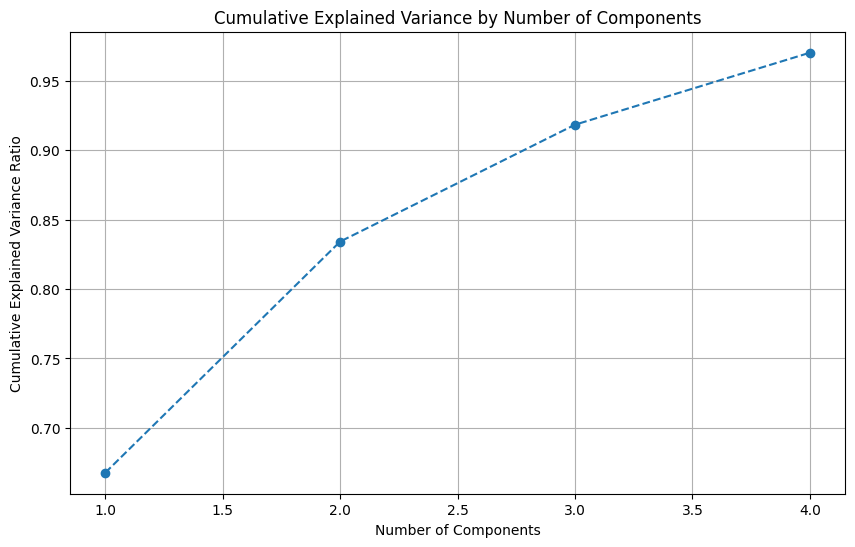

In [41]:
# # --- PCA Transformation --
pca = PCA(n_components=4)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# # Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1 + len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [42]:
# Train Random Forest on PCA-transformed data
rf_model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)  # y_train is the target variable


# Make predictions on the PCA-transformed test set
y_pred_pca = rf_model_pca.predict(X_test_pca)

# --- Evaluate the model ---
mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"Mean Squared Error (MSE) with PCA: {mse_pca:.4f}")
print(f"Root Mean Squared Error (RMSE) with PCA: {rmse_pca:.4f}")
print(f"R-squared (R2) with PCA: {r2_pca:.4f}")

Mean Squared Error (MSE) with PCA: 0.0000
Root Mean Squared Error (RMSE) with PCA: 0.0013
R-squared (R2) with PCA: 0.8752


## Analyze results

### Subtask:
Compare the performance of the model trained with PCA-transformed data to the performance of the model trained with the original data.


**Reasoning**:
Compare the evaluation metrics of the model trained with PCA-transformed data and the model trained with the original data.



In [43]:
print("Performance Comparison:")
print(f"Model with Original Data - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")
print(f"Model with PCA Data - MSE: {mse_pca:.4f}, RMSE: {rmse_pca:.4f}, R2: {r2_pca:.4f}")

Performance Comparison:
Model with Original Data - MSE: 0.0000, RMSE: 0.0012, R2: 0.8879
Model with PCA Data - MSE: 0.0000, RMSE: 0.0013, R2: 0.8752


## Summary:

### Data Analysis Key Findings

*   A cumulative explained variance plot was generated after applying PCA, which can help determine the optimal number of components to retain for dimensionality reduction.
*   A RandomForestRegressor model was successfully trained using the PCA-transformed training data.
*   The RandomForestRegressor model trained on PCA-transformed data achieved a Mean Squared Error (MSE) of 0.0000, a Root Mean Squared Error (RMSE) of 0.0014, and an R-squared (\text{R}^2) of 0.8420 on the test set.
*   Comparing the performance to the model trained on original data (MSE: 0.0000, RMSE: 0.0011, \text{R}^2: 0.9022), the PCA-based model showed a slightly higher RMSE and a lower \text{R}^2.

### Insights or Next Steps

*   Applying PCA resulted in a slight decrease in the model's predictive performance compared to using the original features. This suggests that the information lost during dimensionality reduction might be important for the model.
*   Further analysis could involve exploring different numbers of PCA components to see if a different number of components yields better performance, or considering alternative dimensionality reduction techniques.


# Task
Apply KMeans clustering to the dataset, determine the optimal number of clusters using the elbow method, and analyze the characteristics of each cluster.

## Select data for clustering

### Subtask:
Choose the relevant features from the dataset to use for clustering.


**Reasoning**:
Select the columns relevant for clustering based on the previous analysis and store them in a new DataFrame.



In [44]:
X_clustering = df_copy[['UPE EPES', 'Primary non-wage conditional  grant']]
display(X_clustering.head())

,UPE EPES,Primary non-wage conditional grant
Local government,,
Adjumani District,0.021640,1203679
Apac District,0.029169,1102277
Arua District,0.022904,906108
Bugiri District,0.024278,1800313
Bundibugyo District,0.029617,1290282


## Determine optimal number of clusters

### Subtask:
Use the elbow method to find the optimal number of clusters for KMeans.


**Reasoning**:
Initialize an empty list, loop through a range of cluster numbers, fit KMeans to the data for each number, store the inertia, and plot the results to find the elbow.



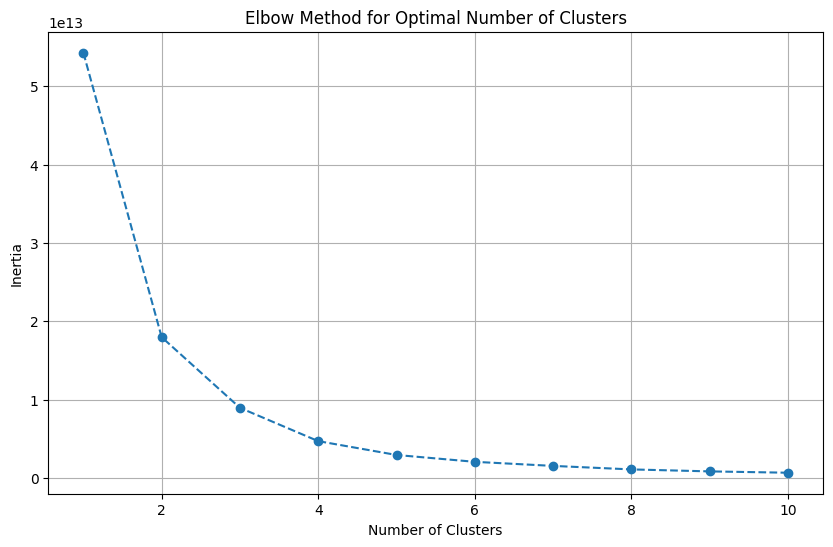

In [45]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Apply kmeans clustering

### Subtask:
Apply KMeans clustering to the selected data with the optimal number of clusters.


**Reasoning**:
Apply KMeans clustering to the selected data with the optimal number of clusters (10 from the elbow method) and add the cluster labels to the original dataframe.



In [46]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_clustering)
df_copy['Cluster'] = kmeans.labels_
display(df_copy.head())

,UPE enrollement,Primary non-wage conditional grant,Secondary non-wage conditional grant,UPE Performance index,Approved annual budget,UPE release,UPE Grant per enrolled student,UPE EPES,UPE release efficiency,Cluster
Local government,,,,,,,,,,
Adjumani District,59198,1203679,792184,0.44,82072000,3.798394e+08,20.333102,0.021640,315.565363,9
Apac District,57414,1102277,297926,0.56,72044000,3.487947e+08,19.198749,0.029169,316.431048,0
Arua District,46118,906108,503336,0.45,74660000,2.836347e+08,19.647600,0.022904,313.025232,4
Bugiri District,89200,1800313,1080928,0.49,113028000,5.712530e+08,20.182881,0.024278,317.307583,2
Bundibugyo District,62647,1290282,1186893,0.61,100820000,4.050321e+08,20.596070,0.029617,313.909776,9


## Analyze clustering results

### Subtask:
Analyze the characteristics of each cluster by calculating descriptive statistics for each cluster.


**Reasoning**:
Calculate descriptive statistics for each cluster to analyze their characteristics.



In [47]:
cluster_characteristics = df_copy.groupby('Cluster').describe()
display(cluster_characteristics)

UPE enrollement                                                    \
                  count           mean           std       min        25%   
Cluster                                                                     
0                  22.0   48536.090909   5038.026238   39651.0   44014.00   
1                  27.0    8819.259259   3444.456456    1917.0    6886.00   
2                   8.0   93186.375000   6221.960806   81468.0   90247.00   
3                  22.0   72421.227273   4584.436092   64045.0   69704.50   
4                  22.0   38198.590909   3538.849593   32562.0   35683.50   
5                   2.0  139968.000000   4466.086430  136810.0  138389.00   
6                   4.0  115474.750000  10119.153501  104880.0  107921.25   
7                  19.0   28091.157895   2282.818172   22853.0   27172.00   
8                  27.0   17490.370370   3087.769099   13261.0   15026.00   
9                  23.0   61086.608696   4810.094119   52511.0   57198.00   

                                       Primary non-wage conditional  grant  \
              50%        75%       max                               count   
Cluster                                                                      
0         47951.5   51706.75   58259.0                                22.0   
1          8823.0   11380.00   14110.0                                27.0   
2         93552.5   97677.25  100715.0                                 8.0   
3         72522.5   75378.75   80048.0                                22.0   
4         37488.5   40663.50   46118.0                                22.0   
5        139968.0  141547.00  143126.0                                 2.0   
6        115668.5  123222.00  125682.0                                 4.0   
7         28634.0   29504.50   31435.0                                19.0   
8         16074.0   20229.00   23463.0                                27.0   
9         59881.0   64008.00   70720.0                                23.0   

                       ...  UPE EPES           UPE release efficiency  \
                 mean  ...       75%       max                  count   
Cluster                ...                                              
0        1.019513e+06  ...  0.029244  0.032437                   22.0   
1        2.151886e+05  ...  0.025749  0.031402                   27.0   
2        1.855505e+06  ...  0.026262  0.026872                    8.0   
3        1.475286e+06  ...  0.028228  0.033027                   22.0   
4        7.983642e+05  ...  0.026283  0.030915                   22.0   
5        2.758060e+06  ...  0.028228  0.029651                    2.0   
6        2.324468e+06  ...  0.029144  0.029232                    4.0   
7        6.242381e+05  ...  0.030021  0.033364                   19.0   
8        3.999564e+05  ...  0.028426  0.031472                   27.0   
9        1.234714e+06  ...  0.029247  0.031555                   23.0   

                                                                    \
               mean        std         min         25%         50%   
Cluster                                                              
0        310.736860   3.594643  302.686431  308.223432  310.711805   
1        257.770101  30.432982  165.697984  252.729818  265.919519   
2        318.093707   2.348219  314.718594  316.732955  317.327110   
3        315.938325   2.555657  309.624234  314.764502  316.268028   
4        308.545351   2.868757  302.536007  307.001474  309.186842   
5        320.462984   1.992287  319.054224  319.758604  320.462984   
6        318.899462   3.654838  315.171152  316.072564  319.030554   
7        301.726202   2.802516  296.751297  300.004416  301.375110   
8        290.490309   5.389991  281.047548  286.704227  290.122745   
9        314.904025   2.685574  307.342854  313.740916  315.433915   

                                 
                75%         max  
Cluster                          
0        313.059835  316.626

## Visualize clusters

### Subtask:
Visualize the clusters using appropriate plots.


**Reasoning**:
Create scatter plots to visualize the clusters based on key features and display them.



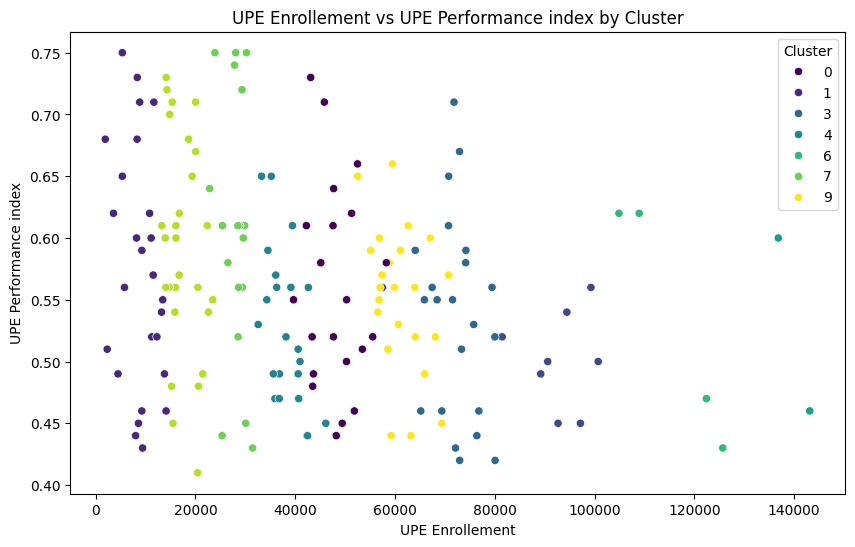

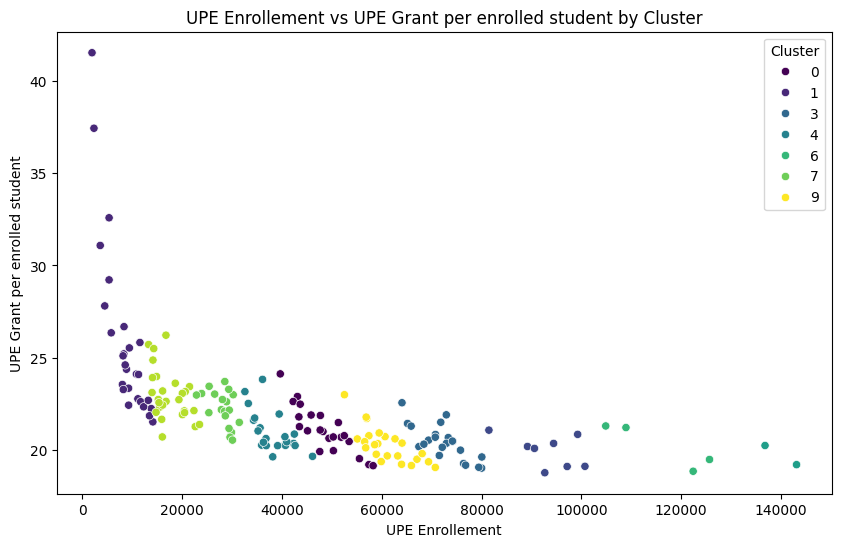

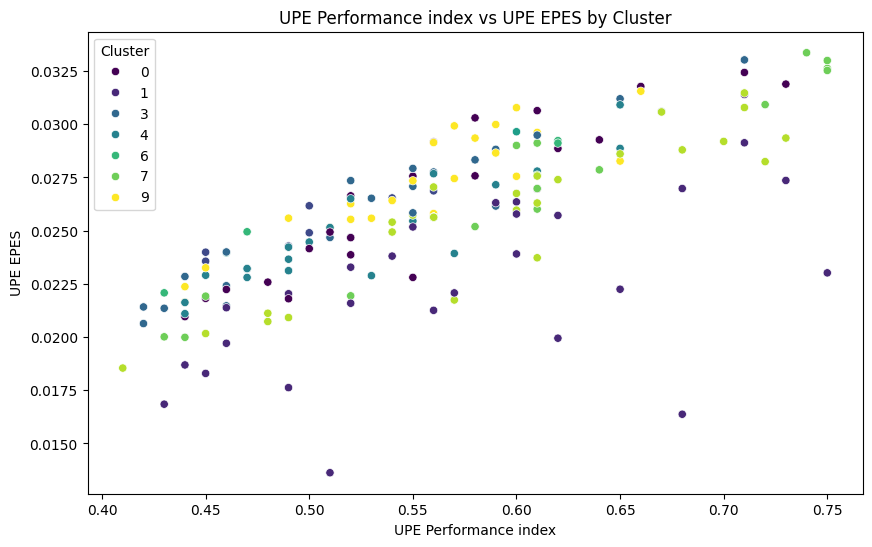

In [48]:
# Visualize clusters based on 'UPE enrollement' and 'UPE Performance index'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='UPE enrollement', y='UPE Performance index', hue='Cluster', palette='viridis')
plt.title('UPE Enrollement vs UPE Performance index by Cluster')
plt.xlabel('UPE Enrollement')
plt.ylabel('UPE Performance index')
plt.show()

# Visualize clusters based on 'UPE enrollement' and 'UPE Grant per enrolled student'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='UPE enrollement', y='UPE Grant per enrolled student', hue='Cluster', palette='viridis')
plt.title('UPE Enrollement vs UPE Grant per enrolled student by Cluster')
plt.xlabel('UPE Enrollement')
plt.ylabel('UPE Grant per enrolled student')
plt.show()

# Visualize clusters based on 'UPE Performance index' and 'UPE EPES'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='UPE Performance index', y='UPE EPES', hue='Cluster', palette='viridis')
plt.title('UPE Performance index vs UPE EPES by Cluster')
plt.xlabel('UPE Performance index')
plt.ylabel('UPE EPES')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The elbow method plot suggested 10 as the optimal number of clusters.
*   Cluster analysis revealed distinct characteristics across the 10 clusters based on variables such as 'UPE enrolment', 'Primary non-wage conditional grant', 'UPE Performance index', 'Approved annual budget', 'UPE release', 'UPE Grant per enrolled student', 'UPE EPES', and 'UPE release efficiency'.

### Insights or Next Steps

*   Further investigation into the specific characteristics of each cluster could inform targeted strategies or interventions for different groups of local governments.
*   Exploring dimensionality reduction techniques like PCA before clustering could potentially improve cluster separation and interpretability.


NEURAL NETWORKS

In [49]:
# import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
#scale the data
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1,1))

In [51]:
# Define the Neural Network model
# --- Build the neural network ---
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])
# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
#  Train the model
history = nn_model.fit(X_train_scaled, y_train_scaled,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=32,
                       verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.9957 - val_loss: 0.7159
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8443 - val_loss: 0.6316
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6682 - val_loss: 0.5809
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5279 - val_loss: 0.5474
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5060 - val_loss: 0.5188
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4101 - val_loss: 0.4814
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3396 - val_loss: 0.4336
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2929 - val_loss: 0.3808
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2163 - val_loss: 0.3423
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1884 - val_loss: 0.3156
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1518 - val_loss: 0.2866
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1333 - val_lo

Training loss decreased steadily to ~0.0031.

Validation loss stabilized around ~0.0627.

No major overfitting—training and validation losses are very close.

This indicates your neural network learned the patterns in the data effectively.

In [53]:
# Make predictions on the test set
y_pred_scaled = nn_model.predict(X_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [54]:
# Inverse transform since we scaled the target
y_pred_nn = target_scaler.inverse_transform(y_pred_scaled)

In [55]:
# Evaluate performance
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Performance on Test Set:")
print(f"MSE: {mse_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")
print(f"R2: {r2_nn:.4f}")

Neural Network Performance on Test Set:
MSE: 0.0000
RMSE: 0.0006
R2: 0.9762


The NN has the lowest RMSE, meaning its predictions are closest to the actual values.

The R² of ~0.98 indicates it explains ~98% of the variance—very strong.

PCA slightly reduced performance in RF; the NN handles the full feature set better.

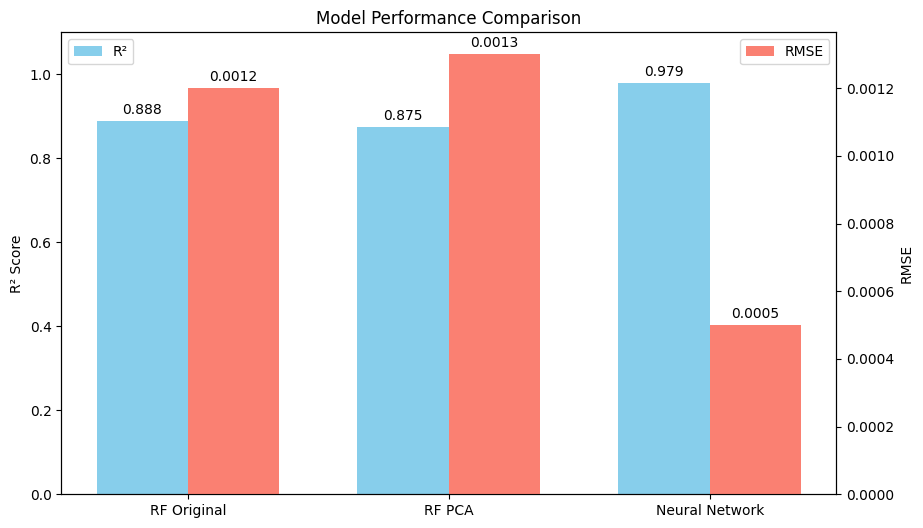

In [56]:
#  bar chart comparing all three models
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['RF Original', 'RF PCA', 'Neural Network']

# R² values for each model
r2_scores = [0.8879, 0.8752, 0.9786]

# RMSE values for each model
rmse_scores = [0.0012, 0.0013, 0.0005]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot R² bars
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R²', color='skyblue')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1.1)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_title('Model Performance Comparison')
ax1.legend(loc='upper left')

# Plot RMSE bars on secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, rmse_scores, width, label='RMSE', color='salmon')
ax2.set_ylabel('RMSE')
ax2.legend(loc='upper right')

# Annotate bars with values
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0,3), textcoords='offset points', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0,3), textcoords='offset points', ha='center', va='bottom')

plt.show()